In [1]:
# Code to create histograms for CMIP6 ensemble + observational data
# Author: Nathan Erickson
# Date: 11/1/2021
# Coded with Python 3.8.10

In [2]:
# Module importing; directory management

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path = '/home/nathane1/Thesis/output'
if not os.getcwd().endswith('output'):
    os.chdir(path)
print(os.getcwd())

/home/nathane1/Thesis/output


In [3]:
# Read in data, do some partitioning

data = pd.read_csv('ens_averages.csv', index_col = 'Datetimes')
ERSST = pd.read_csv('djf_ERSSTv5.csv', index_col='Unnamed: 0')
ERSST.index = ERSST.index.rename('Datetimes')

[]

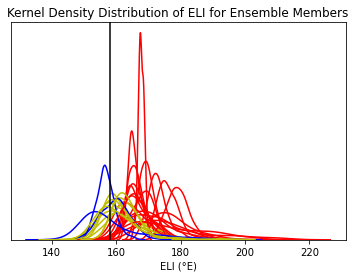

In [4]:
ens_palette = {}
for model in data:
    if np.mean(data[model]) < 160:
        ens_palette[model] = 'b'
    elif (np.mean(data[model]) > 160) & (np.mean(data[model]) < 165):
        ens_palette[model] = 'y'
    else:
        ens_palette[model] = 'r'
        
ens_zorder = {}
for model in data:
    ens_zorder[model] = -1 * np.mean(data[model])

ens_kde = sns.kdeplot(data = data, legend = False, palette = ens_palette)
for line_index,line in enumerate(ens_kde.lines):
    if line_index == len(data.T):
        break
    plt.setp(line, zorder = (-1 * np.median(data[data.columns[line_index]])))
ens_kde.axvline(x = np.median(ERSST['ERSST_v5']), label = 'ERSST_v5 Mean', color = 'k', zorder = 200)
ens_kde.set_title('Kernel Density Distribution of ELI for Ensemble Members')
ens_kde.set_xlabel('ELI (°E)')
ens_kde.set_ylabel('')
ens_kde.set_yticks([])
ens_kde.set_yticklabels([]) 

In [7]:
img_dir = '/home/nathane1/Thesis/images'
os.chdir(img_dir)
kde_fig = ens_kde.get_figure()
kde_fig.savefig('ens_kde.jpg', bbox_inches = 'tight')

Text(0.5, 0, 'Mean ELI')

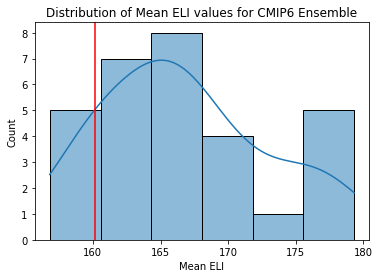

In [20]:
ens_hist = sns.histplot(data = np.mean(data), kde = True)
ens_hist.set_title('Distribution of Mean ELI values for CMIP6 Ensemble')
ens_hist.axvline(label = 'ERSST_v5 Mean', x = np.mean(ERSST['ERSST_v5']), color = 'r')
ens_hist.set_xlabel('Mean ELI')

In [21]:
os.chdir(img_dir)

ens_fig = ens_hist.get_figure()
ens_fig.savefig('ens_hist.jpg', bbox_inches = 'tight')

In [86]:
ens_zorder = {}
for model in data:
    ens_zorder[model] = -1 * np.mean(data[model])
    print(ens_zorder[model])
print(ens_zorder)

-160.1818805988024
-163.9088546568862
-169.4837551550898
-163.82949596586826
-160.63351675269462
-164.24585408323352
-167.80347755748502
-163.69632007604793
-176.1303308790419
-171.39226713113774
-179.3162593772455
-166.76440235808383
-167.1274872718563
-176.1780227197605
-159.71179405329343
-160.63477299341315
-160.07685503053892
-175.97816736646706
-166.16507473353295
-165.19974714910182
-168.73726989820358
-166.16104830958085
-156.81532297065868
-165.8507991497006
-177.36455886946106
-165.6476343035928
-172.96738221736527
-170.7167947808383
-161.78236229281438
-158.48465965508979
{'ERSST_v5': -160.1818805988024, 'ACCESS-CM2': -163.9088546568862, 'ACCESS-ESM1-5': -169.4837551550898, 'AWI-CM-1-1-MR': -163.82949596586826, 'BCC-CSM2-MR': -160.63351675269462, 'CAMS-CSM1-0': -164.24585408323352, 'CanESM5': -167.80347755748502, 'CMCC-CM2-SR5': -163.69632007604793, 'CNRM-CM-6-1': -176.1303308790419, 'CNRM-CM6-1-HR': -171.39226713113774, 'CNRM-ESM2-1': -179.3162593772455, 'EC-Earth3': -166.7